In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
def distance(X, x_test):
    return np.sqrt(np.sum((X - x_test) ** 2, axis=1))

In [3]:
def knn(X, y, x_test, k):
    nn = []
    dist = distance(X, x_test)
    tmp = max(dist)
    for _ in range(k):
        idx = np.argmin(dist)
        nn.append([y[idx], dist[idx], *X[idx]])
        dist[idx] = tmp
    nn = np.array(nn)
    print("K-points:\n{}".format(nn))
    return nn

In [4]:
from numpy.lib.function_base import median
def kd_tree(X, y, x_test, depth, d, k):
    print("CURRENT LVL: {}".format(d))
    
    if X.shape[0] < k:
        print("Number of points on the branch: {}".format(X.shape[0]))
        return None
    if d == depth:
        return knn(X, y, x_test, k)
    
    max_variance_column = np.argmax(X.var(axis=0))
    # max_variance_column = np.random.randint(0, 2) # just a random col!!!
    median_max_variance_col = np.median(X[:, max_variance_column])

    if x_test[max_variance_column] >= median_max_variance_col:
        print("R")
        flag = "R"
        indices = X[:, max_variance_column] >= median_max_variance_col
        nn = kd_tree(X[indices], y[indices], x_test, depth, d+1, k)
    else:
        print("L")
        flag = "L"
        indices = X[:, max_variance_column] < median_max_variance_col
        nn = kd_tree(X[indices], y[indices], x_test, depth, d+1, k)
    
    if nn is None:
        print("R + L")
        return knn(X, y, x_test, k)
    
    dist_to_sep_line = np.abs(x_test[max_variance_column] - median_max_variance_col)
    print("DISTANCE TO SEPARATE LINE: {}".format(dist_to_sep_line))
    if dist_to_sep_line < nn[-1, 1]:
        nn_2 = kd_tree(X[~indices], y[~indices], x_test, depth, d+1, k)
        if nn_2 is None:
            return nn
    else:
        return nn
    print("###################################")
    print("NN: \n{}".format(nn))
    print("NN_2: \n{}".format(nn_2))
    print("###################################")
    for i in range(k):
        for j in range(k):
            if nn[i, 1] > nn_2[j, 1]:
                nn[[i]], nn_2[[j]] = nn_2[[j]], nn[[i]]
    return nn

CURRENT LVL: 1
L
CURRENT LVL: 2
L
CURRENT LVL: 3
R
CURRENT LVL: 4
R
CURRENT LVL: 5
K-points:
[[0.         0.08402019 1.53355298 0.5770298 ]
 [0.         0.28711602 1.77257755 0.40979419]
 [0.         0.305219   1.22787433 0.63822537]]
DISTANCE TO SEPARATE LINE: 0.2721256736085065
CURRENT LVL: 5
K-points:
[[0.         0.43163923 1.11774116 0.70047595]
 [0.         0.49968414 1.00716336 0.41756039]
 [0.         0.59109898 1.0216615  0.15273889]]
###################################
NN: 
[[0.         0.08402019 1.53355298 0.5770298 ]
 [0.         0.28711602 1.77257755 0.40979419]
 [0.         0.305219   1.22787433 0.63822537]]
NN_2: 
[[0.         0.43163923 1.11774116 0.70047595]
 [0.         0.49968414 1.00716336 0.41756039]
 [0.         0.59109898 1.0216615  0.15273889]]
###################################
DISTANCE TO SEPARATE LINE: 0.37215727666610204
DISTANCE TO SEPARATE LINE: 0.37454575671205026
DISTANCE TO SEPARATE LINE: 2.747106204424293
*********************************************

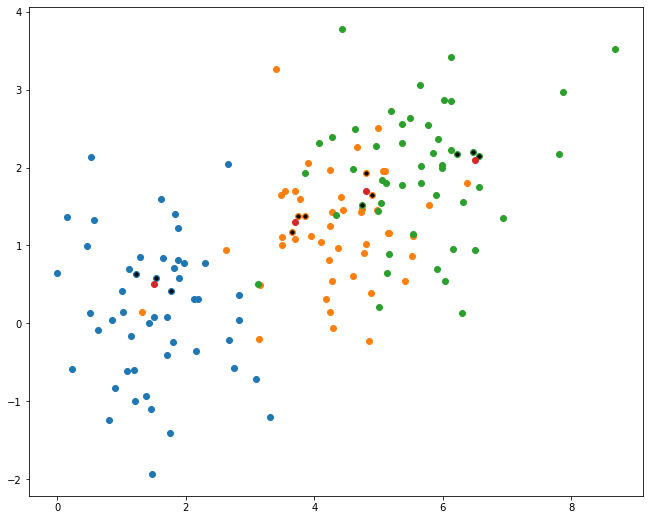

In [5]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
X += 0.75 * np.random.randn(150, 2) # some noise

y = iris.target
x_test = np.array([[1.5, 0.5], [3.7, 1.3], [6.5, 2.1], [4.8, 1.7]])
plt.figure(figsize=(11, 9))
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 2, 0], X[y == 2, 1])
plt.scatter(x_test[:, 0], x_test[:, 1])
for point in x_test:
    ans = kd_tree(X, y, point, 5, 1, 3)
    print("***********************************************")
    print("POINT: {}".format(point))
    print("NEAREST NEIGHBORS:\n{}".format(ans), end='\n\n')
    print("***********************************************")
    plt.scatter(ans[:, 2], ans[:, 3], color='black', s=11)
plt.show()